<div style="color:#62caf0;">
<h2 style="font-weight:700">CS 4103 - Intelligent Systems</h2>
<h3>Hands-on Example 2 - Normalization and Standardization</h3>
<h4>September 6, 2023</h4>
</div>

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

from sklearn.metrics import RocCurveDisplay, roc_curve, auc, classification_report, confusion_matrix

### Cars - Purchase Decision Dataset
---
A purchase decision data set, indicating whether or not a client bought a car

In [3]:
project_data = pd.read_csv("car_data.csv")

In [4]:
project_data.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [5]:
project_data.tail()

,User ID,Gender,Age,AnnualSalary,Purchased
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1
999,687,Female,44,73500,0


In [6]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [7]:
project_data.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [8]:
project_data.columns

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

In [9]:
project_data.isna().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

## Bivariate EDA

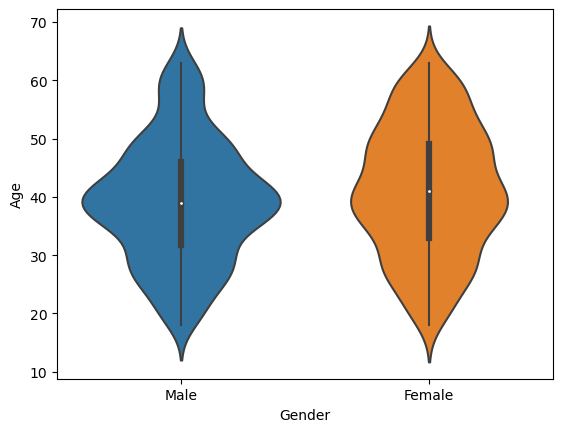

In [10]:
ax = sns.violinplot(x="Gender", y="Age", data=project_data)

## Univariate EDA

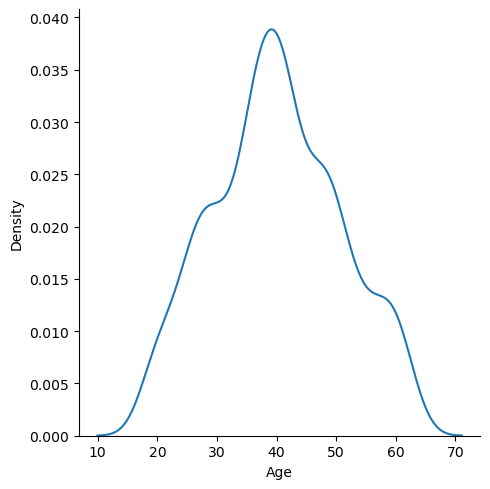

In [11]:
sns.displot(project_data, x="Age", kind="kde")

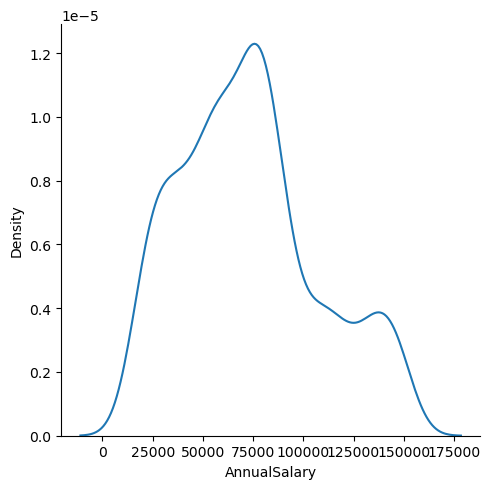

In [12]:
sns.displot(project_data, x="AnnualSalary", kind="kde")

<Axes: >

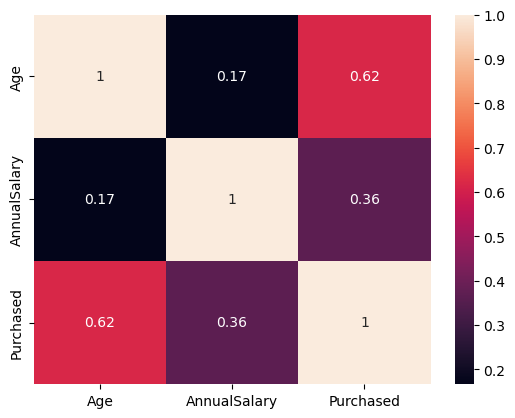

In [13]:
project_data = project_data.drop(columns='User ID')
corr_data = project_data.drop(columns='Gender')
corr = corr_data.corr()
sns.heatmap(corr, annot=True)

### Data Preprocessing

In [14]:
X = project_data.iloc[:, 0:-1].values
y = project_data.iloc[:, -1].values


In [15]:
X

array([['Male', 35, 20000],
       ['Male', 40, 43500],
       ['Male', 49, 74000],
       ...,
       ['Female', 28, 138500],
       ['Female', 48, 134000],
       ['Female', 44, 73500]], dtype=object)

In [16]:
# Label encoding of Gender
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])

In [17]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<h3>Feature scaling</h3>
<h5 style="color:yellow;">You can try various scaling methods here.</h5>

In [18]:
# Standardization (Why?)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
print('Train dataset shape:',X_train.shape)
print('Test dataset shape', X_test.shape)

Train dataset shape: (700, 3)
Test dataset shape (300, 3)


In [32]:
X_train

array([[-0.98019606,  0.99142304, -1.47432242],
       [ 1.02020406,  0.05015608, -0.7980183 ],
       [-0.98019606, -0.60873079,  1.20211515],
       ...,
       [ 1.02020406,  1.93269   ,  0.33874819],
       [-0.98019606, -0.98523757, -0.30877703],
       [-0.98019606, -2.02063123, -0.78362885]])

### Setting up the ANN model

In [21]:
ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=3, activation='relu'),   # Input layer
    tf.keras.layers.Dense(units=6, activation='tanh'),   # Hidden layer
    tf.keras.layers.Dense(units=3, activation='tanh'),   # Input layer
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Output layer
])
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
print('Model compiled!')

Model compiled!


#### Training the model

In [22]:
ann.fit(X_train, y_train, batch_size = 1, epochs = 50)

Epoch 1/50
700/700 [==============================] - 2s 2ms/step - loss: 0.6542 - accuracy: 0.6486
Epoch 2/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4953 - accuracy: 0.8286
Epoch 3/50
700/700 [==============================] - 1s 1ms/step - loss: 0.3782 - accuracy: 0.8686
Epoch 4/50
700/700 [==============================] - 1s 2ms/step - loss: 0.3223 - accuracy: 0.8857
Epoch 5/50
700/700 [==============================] - 1s 2ms/step - loss: 0.2907 - accuracy: 0.8943
Epoch 6/50
700/700 [==============================] - 1s 1ms/step - loss: 0.2735 - accuracy: 0.9014
Epoch 7/50
700/700 [==============================] - 1s 1ms/step - loss: 0.2652 - accuracy: 0.9000
Epoch 8/50
700/700 [==============================] - 1s 1ms/step - loss: 0.2589 - accuracy: 0.9057
Epoch 9/50
700/700 [==============================] - 1s 1ms/step - loss: 0.2554 - accuracy: 0.9071
Epoch 10/50
700/700 [==============================] - 1s 1ms/step - loss: 0.2524 - accuracy: 0.9071

#### Predicting outputs in the test set

In [23]:
y_pre = ann.predict(X_test)
y_pred = (y_pre > 0.5)

10/10 [==============================] - 0s 1ms/step


#### Confusion matrix

In [24]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(cm)
print(classification_report(y_test, y_pred, target_names=["not purchased","purchased"], digits= 4))

Confusion matrix:
[[163  14]
 [ 15 108]]
               precision    recall  f1-score   support

not purchased     0.9157    0.9209    0.9183       177
    purchased     0.8852    0.8780    0.8816       123

     accuracy                         0.9033       300
    macro avg     0.9005    0.8995    0.9000       300
 weighted avg     0.9032    0.9033    0.9033       300



#### ROC-AUC Curve

 1/10 [==>...........................] - ETA: 0s

10/10 [==============================] - 0s 2ms/step


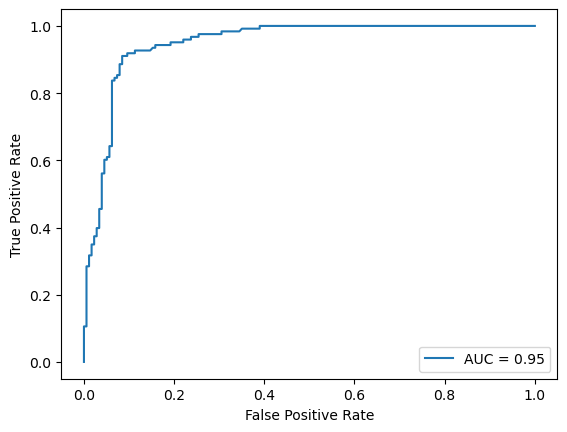

In [25]:
y_pred_proba = ann.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
roc_auc = auc(fpr, tpr)
curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
curve.plot()
plt.show()